In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

# Графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import pandas as pd

In [2]:
df = pd.read_csv('video_games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Некоторые признаки, которые pandas считал как object, явно приведем к типам float или int.

In [4]:
df = df.dropna()
print(df.shape)

(6825, 16)


In [5]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

Данные есть не для всех игр, поэтому давайте оставим только те записи, в которых нет пропусков, с помощью метода dropna.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int64  
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   int64  
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   int64  
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 906.4+ KB


Всего в таблице 6825 объектов и 16 признаков для них. Посмотрим на несколько первых записей c помощью метода head, чтобы убедиться, что все распарсилось правильно. Для удобства я оставила только те признаки, которые мы будем в дальнейшем использовать.

In [7]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


# Pandas .plot()

Построим график продаж видео игр в различных странах в зависимости от года. Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам и у получившегося DataFrame вызовем функцию plot без параметров.

In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129,Nintendo,E


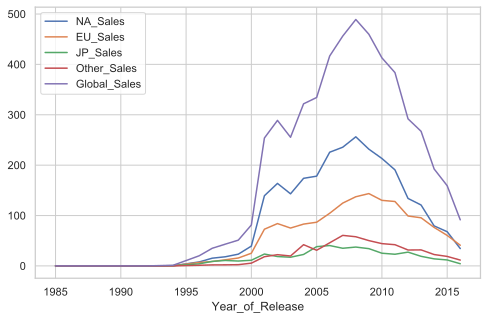

In [9]:
sales = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales.groupby(['Year_of_Release']).sum().plot()

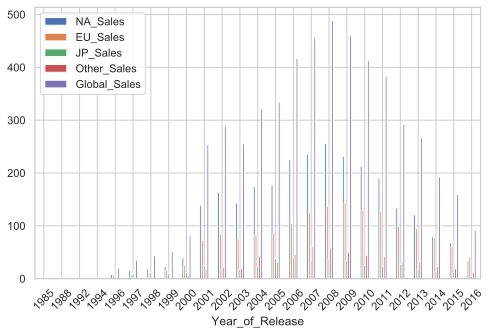

In [10]:
sales.groupby(['Year_of_Release']).sum().plot(kind='bar', rot=45)

# Seaborn

## pairplot()

Познакомимся с первым таким "сложным" типом графиков pair plot (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

In [11]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
# sns_plot = sns.pairplot(df[cols])
# sns_plot.savefig('pairplot.png')

Для сохранения графиков в файлы стоит использовать метод savefig.

## distplot()

С помощью seaborn можно построить и распределение dist plot. Для примера посмотрим на распределение оценок критиков Critic_Score. По умолчанию на графике отображается гистограмма и kernel density estimation.

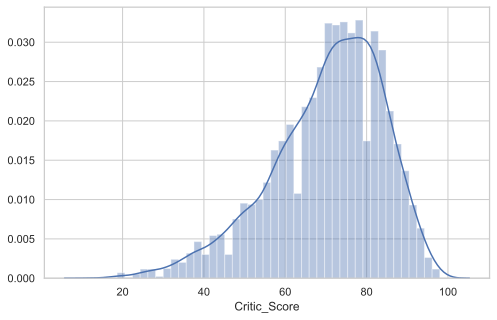

In [12]:
sns.distplot(df.Critic_Score)

Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и **jointplot()** — это гибрид scatter plot и histogram. Посмотрим на то, как связаны между собой оценка критиков Critic_Score и оценка пользователя User_Score.

In [13]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4,2.4,21,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12,8.8,9,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20,7.6,412,Kojima Productions,M
16700,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12,5.8,43,Atomic Games,T


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int64  
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   int64  
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   int64  
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 906.4+ KB


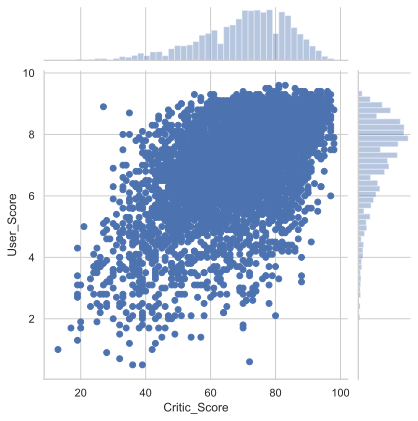

In [15]:
sns.jointplot(data=df, x='Critic_Score', y='User_Score')

## boxplot()
Еще один полезный тип графиков — это box plot. Давайте сравним оценки игр от критиков для топ-5 крупнейших игровых платформ.

In [16]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E


In [17]:
top_platforms = df.Platform.value_counts().head(5).index.values
top_platforms

array(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype=object)

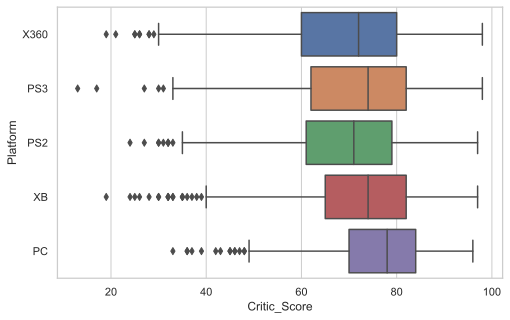

In [18]:
sns.boxplot(y='Platform', x='Critic_Score', data=df[df.Platform.isin(top_platforms)])

## heatmap()

И еще один тип графиков (последний из тех, которые мы рассмотрим в этой статье) — это heat map. Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем суммарные продажи игр по жанрам и игровым платформам.

In [19]:
platform_genre_sales = df.pivot_table(index='Platform',
                                      values='Global_Sales',
                                      columns='Genre',
                                      aggfunc='sum').fillna(0).applymap(float)
platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,30.81,2.00,2.63,4.48,27.61,2.63,13.89,18.94,1.02,16.08,2.20,0.94
DC,0.00,1.33,0.56,0.00,0.12,0.00,0.20,0.68,0.05,0.52,1.09,0.00
DS,42.43,8.83,3.37,68.82,55.02,50.50,29.93,60.31,6.40,42.71,6.01,8.00
GBA,23.21,4.54,3.28,8.59,40.36,5.47,12.60,21.00,1.40,2.03,5.93,3.34
GC,29.99,4.56,15.81,12.72,24.67,3.31,11.09,12.48,13.04,8.39,19.91,3.45
PC,25.45,1.42,0.13,3.02,0.46,0.19,3.18,44.68,36.34,40.34,6.54,25.37
PS,54.93,1.10,18.91,5.66,18.92,0.26,34.17,44.07,5.86,1.67,20.75,0.25
PS2,238.73,10.74,64.72,38.70,52.34,3.97,127.17,77.30,98.20,34.01,191.88,8.21
PS3,262.38,16.18,47.83,26.59,20.91,0.40,62.17,64.00,174.54,7.91,98.20,3.19


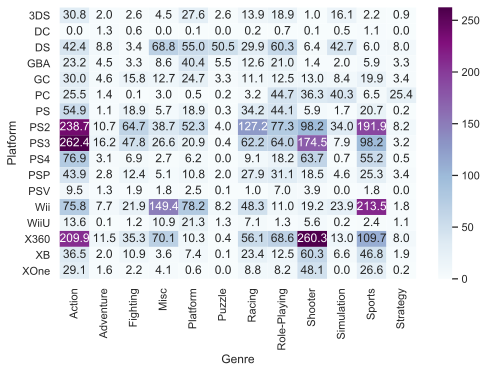

In [20]:
sns.heatmap(platform_genre_sales, annot=True,
            fmt=".1f", cmap='BuPu')

# Plotly
Познакомимся также с библиотекой plotly. Plotly — это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook'e без необходимости зарываться в javascript код.


Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.


Перед началом работы импортируем все необходимые модули и инициализируем plotly с помощью команды init_notebook_mode.

In [21]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для начала построим **line plot** с динамикой числа вышедших игр и их продаж по годам.

In [22]:
# посчитаем число вышедших игр и проданных копий по годам
years = df.groupby(['Year_of_Release'])[['Global_Sales']].sum()
games = years.join(df.groupby(['Year_of_Release'])[['Name']].count())

In [23]:
games.head()

,Global_Sales,Name
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7


In [24]:
games.columns = ['Global_Sales', 'Number_of_Games']

# Создаем линиию для числа проданных копий
trace_0 = go.Scatter(x=games.index, y=games.Global_Sales,
                     name='Global Sales')

# Создаем линию для числа вышедших игр
trace_1 = go.Scatter(x=games.index, y=games.Number_of_Games,
                     name='Number of games released')

# Определяем массив данных и задаем title графика в layout
data = [trace_0, trace_1]
layout = {'title': 'Statistics of video games'}

# Создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

В plotly строится визуализация объекта Figure, который состоит из данных (массив линий, которые в библиотеке называются traces) и оформления/стиля, за который отвечает объект layout. В простых случаях можно вызывать функцию iplot и просто от массива traces.


Параметр show_link отвечает за ссылки на online-платформу plot.ly на графиках. Поскольку обычно это функциональность не нужна, то я предпочитаю скрывать ее для предотвращения случайных нажатий.

Можно сразу сохранить график в виде html-файла.

In [25]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

'years_stats.html'

Посмотрим также на рыночную долю игровых платформ, рассчитанную по количеству выпущенных игр и по суммарной выручке. Для этого построим **bar chart**.

In [26]:
# Cчитаем число проданных и вышедших игр по платформам
platforms = df.groupby(['Platform'])[['Global_Sales']].sum().join(
            df.groupby(['Platform'])[['Name']].count())

In [27]:
platforms.columns = ['global_sales', 'games_released']
platforms.sort_values(by='global_sales', ascending=False, inplace=True)

In [28]:
trace_0 = go.Bar(x=platforms.index, y=platforms.global_sales,
                 name='Global Sales')

trace_1 = go.Bar(x=platforms.index, y=platforms.games_released,
                 name='Number of games released')

data = [trace_0, trace_1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

В plotly можно построить и **box plot**. Рассмотрим распределения оценок критиков в зависимости от жанра игры.

In [29]:
# Cоздаем Box trace для каждого жанра из наших данных
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre == genre].Critic_Score, name=genre)
    )

    
fig = go.Figure(data=data, layout={'title': 'Boxplots for game genres'})
iplot(fig, show_link=False)

С помощью plotly можно построить и другие типы визуализаций. Графики получаются достаточно симпатичными с дефолтными настройками. Однако библиотека позволяет и гибко настраивать различные параметры визуализации: цвета, шрифты, подписи, аннотации и многое другое.

# Пример визуального анализа данных

In [30]:
data = pd.read_csv('telecom_churn.csv')
data.sample(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
529,DC,100,510,Yes,No,0,68.5,110,11.65,337.1,115,28.65,205.2,99,9.23,12.1,9,3.27,0,False
845,FL,144,415,No,Yes,51,283.9,98,48.26,192.0,109,16.32,196.3,85,8.83,10.0,4,2.70,1,False
1691,OR,95,415,No,No,0,269.0,120,45.73,233.7,120,19.86,179.3,61,8.07,7.3,4,1.97,2,True


In [31]:
data.shape

(3333, 20)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Text(0.5, 1.0, 'Clients churn distribution')

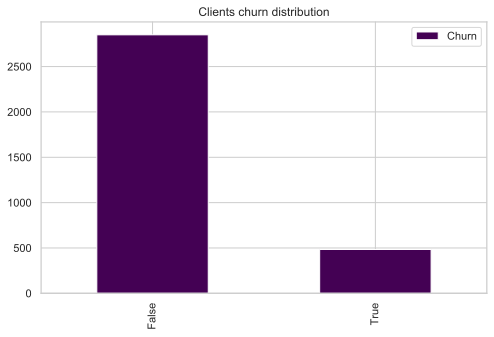

In [33]:
data.Churn.value_counts().plot(kind='bar', label='Churn', colormap='viridis')
plt.legend()
plt.title('Clients churn distribution')

Выделим следующие группы признаков (среди всех кроме Churn ):


* бинарные: International plan, Voice mail plan
* категориальные: State
* порядковые: Customer service calls
* количественные: все остальные

Посмотрим на корреляции количественных признаков. По раскрашенной матрице корреляций видно, что такие признаки как Total day charge считаются по проговоренным минутам (Total day minutes). То есть 4 признака можно выкинуть, они не несут полезной информации.

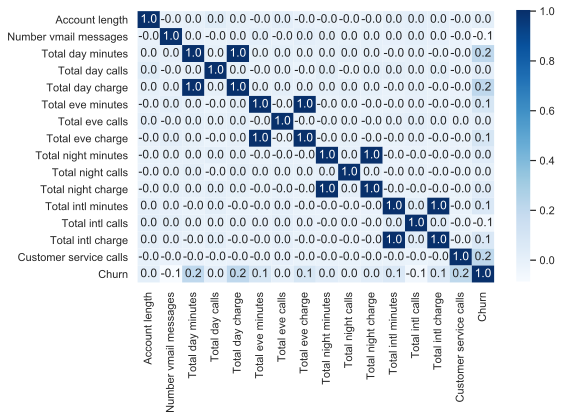

In [34]:
corr = data.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.1f')

Теперь посмотрим на распределения всех интересующих нас количественных признаков. На бинарные/категориальные/порядковые признакие будем смотреть отдельно.

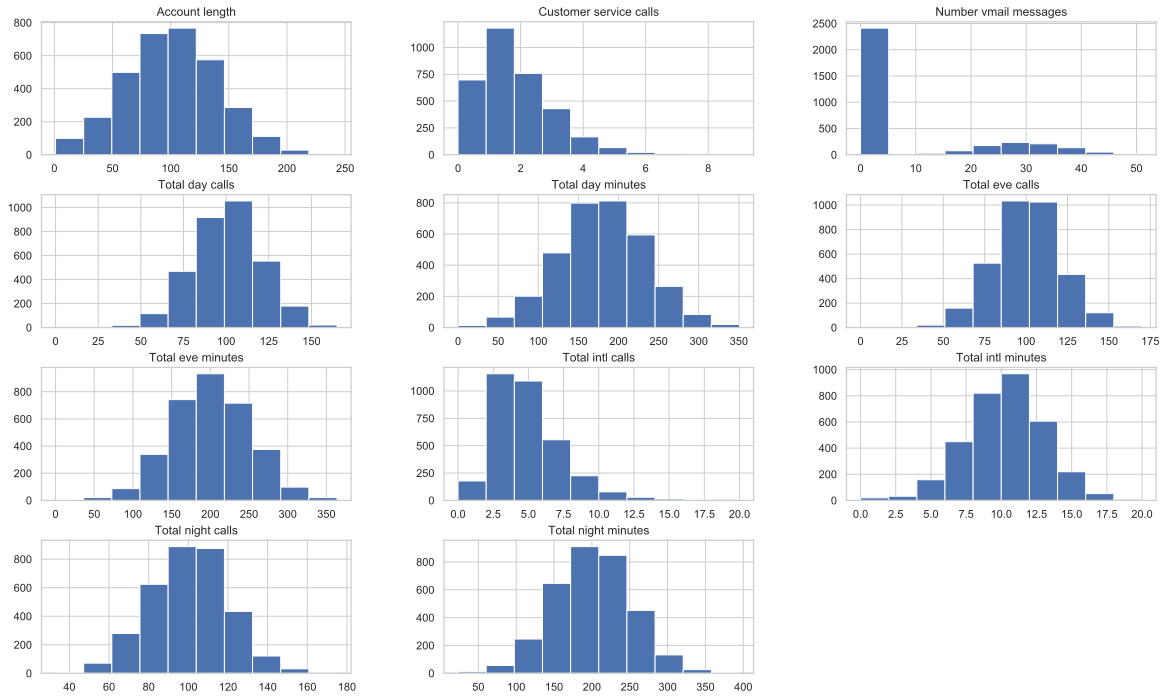

In [35]:
features = list(set(data.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

data[features].hist(figsize=(20,12))
plt.show()

Видим, что большинство признаков распределены нормально. Исключения – число звонков в сервисный центр (Customer service calls) (тут больше подходит пуассоновское распределение) и число голосовых сообщений (Number vmail messages, пик в нуле, т.е. это те, у кого голосовая почта не подключена). Также смещено распределение числа международных звонков (Total intl calls).


Еще полезно строить вот такие картинки, где на главной диагонали рисуются распределения признаков, а вне главной диагонали – диаграммы рассеяния для пар признаков. Бывает, что это приводит к каким-то выводам, но в данном случае все примерно понятно, без сюрпризов.

In [36]:
# sns.pairplot(df[features + ['Churn']], hue='Churn')

Дальше посмотрим, как признаки связаны с целевым – с оттоком.


Построим boxplot-ы, описывающее статистики распределения количественных признаков в двух группах: среди лояльных и ушедших клиентов.

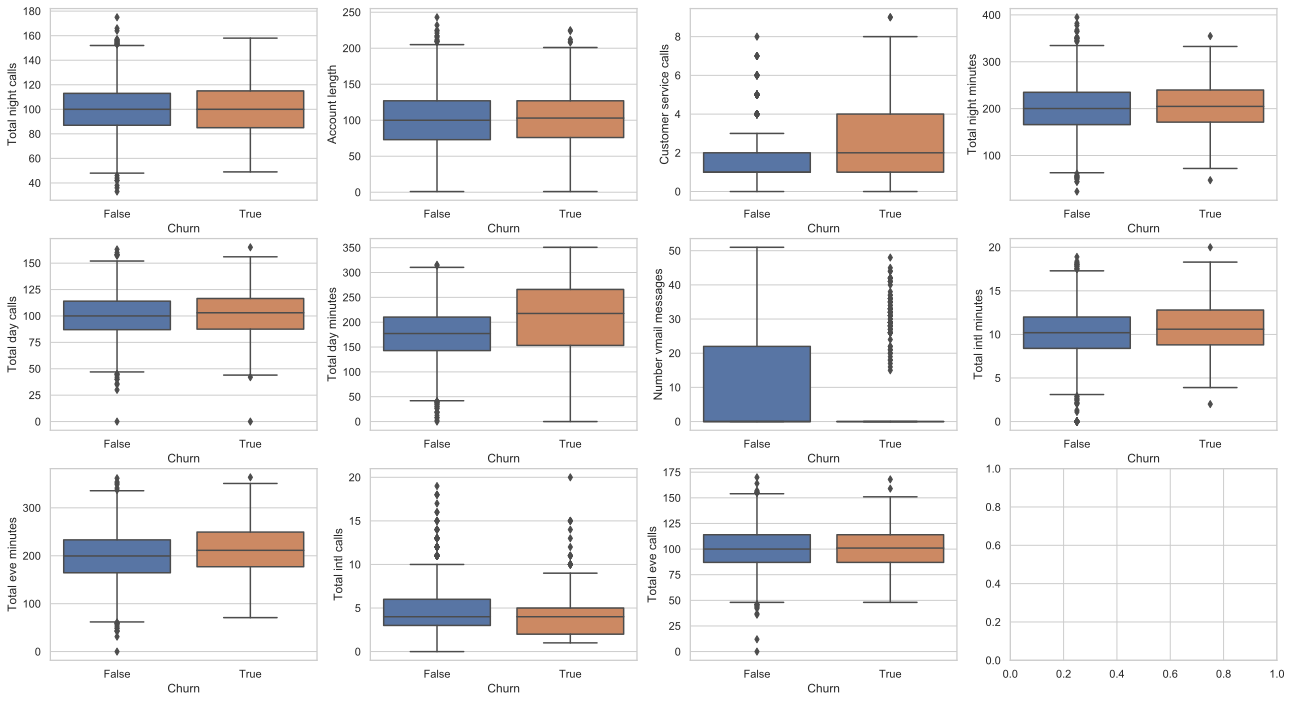

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(22, 12))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=data, ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_xlabel('Churn')
    axes[idx // 4, idx % 4].set_ylabel(feat)

plt.show()

На глаз наибольшее отличие мы видим для признаков Total day minutes, Customer service calls и Number vmail messages. Впоследствии мы научимся определять важность признаков в задаче классификации с помощью случайного леса (или градиентного бустинга), и окажется, что первые два – действительно очень важные признаки для прогнозирования оттока.


Посмотрим отдельно на картинки с распределением кол-ва проговоренных днем минут среди лояльных/ушедших. Слева — знакомые нам боксплоты, справа – сглаженные гистограммы распределения числового признака в двух группах (скорее просто красивая картинка, все и так понятно по боксплоту).


Интересное наблюдение: в среднем ушедшие клиенты больше пользуются связью. Возможно, они недовольны тарифами, и одной из мер борьбы с оттоком будет понижение тарифных ставок (стоимости мобильной связи). Но это уже компании надо будет проводить дополнительный экономический анализ, действительно ли такие меры будут оправданы.

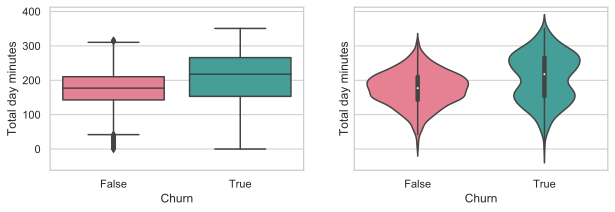

In [38]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 3))

sns.boxplot(x='Churn', y='Total day minutes', data=data, ax=axes[0], palette='husl')
sns.violinplot(x='Churn', y='Total day minutes', data=data, ax=axes[1], palette='husl')

Теперь изобразим распределение числа обращений в сервисный центр (такую картинку мы строили в первой статье). Тут уникальных значений признака не много (признак можно считать как количественным целочисленным, так и порядковым), и наглядней изобразить распределение с помощью countplot. **Наблюдение:** доля оттока сильно возрастает начиная с 4 звонков в сервисный центр.

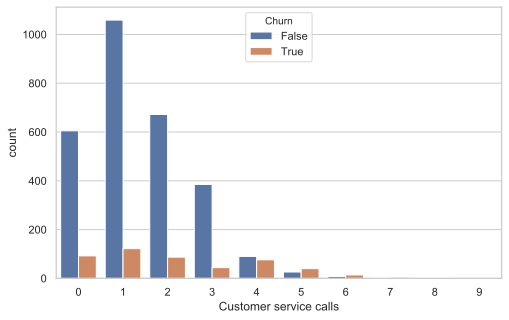

In [39]:
sns.countplot(x='Customer service calls', hue='Churn', data=data)

Теперь посмотрим на связь бинарных признаков International plan и Voice mail plan с оттоком. **Наблюдение:** когда роуминг подключен, доля оттока намного выше, т.е. наличие международного роуминга – сильный признак. Про голосовую почту такого нельзя сказать.

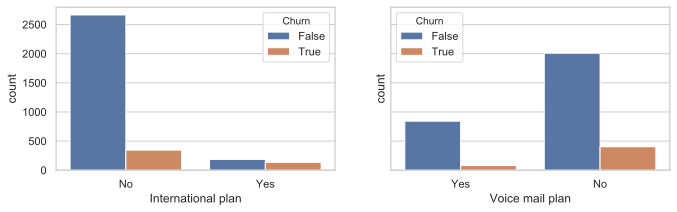

In [40]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(11, 3))

sns.countplot(x='International plan', hue='Churn', data=data, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=data, ax=axes[1])

Наконец, посмотрим, как с оттоком связан категориальный признак **State**. С ним уже не так приятно работать, поскольку число уникальных штатов довольно велико – 51. Можно в начале построить сводную табличку или посчитать процент оттока для каждого штата. Но данных по каждом штату по отдельности маловато (ушедших клиентов всего от 3 до 17 в каждом штате), поэтому, возможно, признак State впоследствии не стоит добавлять в модели классификации из-за риска переобучения (но мы это будем проверять на кросс-валидации, stay tuned!).


Доли оттока для каждого штата:

In [42]:
data.groupby(['State']).Churn.agg([np.mean]).sort_values(by='mean',
                                                       ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


Видно, что в Нью-Джерси и Калифорнии доля оттока выше 25%, а на Гавайях и в Аляске меньше 5%. Но эти выводы построены на слишком скромной статистике и возможно, это просто особенности имеющихся данных (тут можно и гипотезы попроверять про корреляции Мэтьюса и Крамера, но это уже за рамками данной статьи).

# Подглядывание в n-мерное пространство с t-SNE

[t-SNE](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B2%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9_%D1%81_t-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC)

Построим t-SNE представление все тех же данных по оттоку. Название метода сложное – **t-distributed Stohastic Neighbor Embedding**, математика тоже крутая (и вникать в нее не будем, но для желающих – вот оригинальная статья Д. Хинтона и его аспиранта в JMLR), но основная идея проста, как дверь: найдем такое отображение из многомерного признакового пространства на плоскость (или в 3D, но почти всегда выбирают 2D), чтоб точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились на близкие. То есть neighbor embedding – это своего рода поиск нового представления данных, при котором сохраняется соседство.

Немного деталей: выкинем штаты и признак оттока, бинарные Yes/No-признаки переведем в числа (pd.factorize). Также нужно масштабировать выборку – из каждого признака вычесть его среднее и поделить на стандартное отклонение, это делает StandardScaler.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data.drop(['Churn', 'State'], axis=1)
X['International plan'] = pd.factorize(X['International plan'])[0]
X['Voice mail plan'] = pd.factorize(X['Voice mail plan'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
%%time 
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

In [ ]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])

Раскрасим полученное t-SNE представление данных по оттоку (синие – лояльные, оранжевые – ушедшие клиенты)

In [ ]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1],
            c=data['Churn'].map({False: 'blue', True: 'orange'}))

Видим, что ушедшие клиенты преимущественно "кучкуются" в некоторых областях признакового пространства.


Чтоб лучше понять картинку, можно также раскрасить ее по остальным бинарным признакам – по роумингу и голосовой почте. Синие участки соответствуют объектам, обладающим этим бинарным признаком.

Теперь понятно, что, например, много ушедших клиентов кучкуется в левом кластере людей с поключенным роумингом, но без голосовой почты.


Напоследок отметим минусы t-SNE (да, по нему тоже лучше писать отдельную статью):


* большая вычислительная сложность. Вот [эта](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) реализация sklearn скорее всего не поможет в Вашей реальной задаче, на больших выборках стоит посмотреть в сторону [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE);


* картинка может сильно поменяться при изменении random seed, это усложняет интерпретацию. Вот хороший [тьюториал по t-SNE](https://distill.pub/2016/misread-tsne/). Но в целом по таким картинкам не стоит делать далеко идущих выводов – не стоит гадать по кофейной гуще. Иногда что-то бросается в глаза и подтверждается при изучении, но это не часто происходит.

И еще пара картинок. С помощью t-SNE можно действительно получить хорошее представление о данных (как в случае с [рукописными цифрами, вот хорошая статья](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)), а можно просто нарисовать елочную игрушку.


[Хороший видеоролик с объяснением t-SNE](https://www.youtube.com/watch?v=NEaUSP4YerM&ab_channel=StatQuestwithJoshStarmer)


[Математика в t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
